In [24]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [3]:
df=web.DataReader('AAPL',data_source='yahoo',start='2012-06-06',end='2019-06-06')

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-06-05,80.924286,79.761429,80.181427,80.404289,97053600.0,69.605789
2012-06-06,81.978569,80.785713,81.110001,81.637146,100363900.0,70.673080
2012-06-07,82.474289,81.500000,82.470001,81.674286,94941700.0,70.705200
2012-06-08,82.940002,81.285713,81.657143,82.902855,86879100.0,71.768784
2012-06-11,84.071426,81.518570,83.959999,81.595711,147816200.0,70.637215
2012-06-12,82.374283,80.957146,82.065712,82.308571,108845100.0,71.254295
2012-06-13,82.639999,81.482857,82.074287,81.737144,73395000.0,70.759613
2012-06-14,81.928574,81.037140,81.605713,81.647141,86393300.0,70.681709
2012-06-15,82.088570,81.364288,81.571426,82.018570,83813800.0,71.003258


In [7]:
df.shape

(1762, 6)

Text(0, 0.5, 'ClosingPrice')

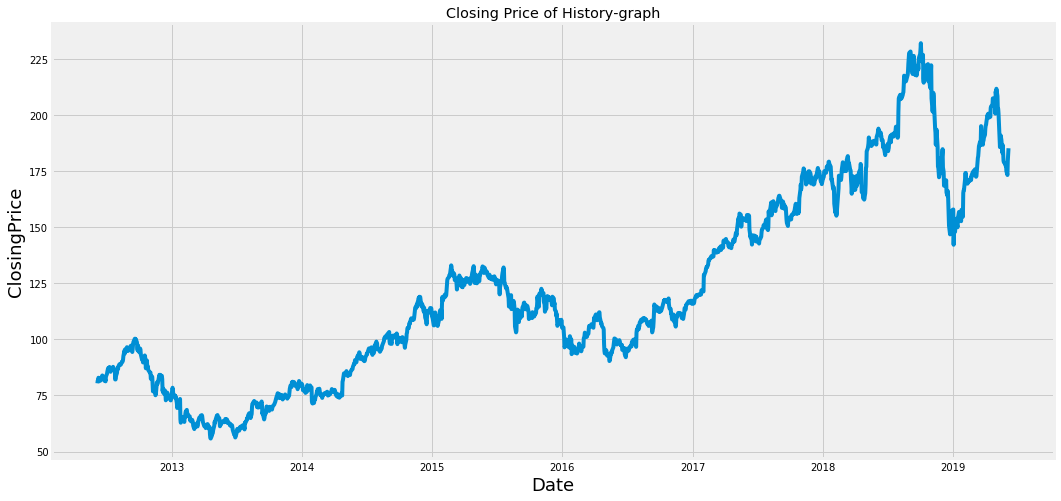

In [9]:
plt.figure(figsize=(16,8))
plt.title("Closing Price of History-graph")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('ClosingPrice',fontsize=18)

In [11]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)

In [12]:
training_data_len

1410

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [15]:
scaled_data

array([[0.13963176],
       [0.14662551],
       [0.14683619],
       ...,
       [0.70257541],
       [0.71902648],
       [0.73422961]])

In [17]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([0.13963176, 0.14662551, 0.14683619, 0.15380561, 0.14639045,
       0.15043436, 0.14719278, 0.1466822 , 0.14878924, 0.15823038,
       0.15955137, 0.15819797, 0.15165806, 0.15524813, 0.14606633,
       0.14708743, 0.14908909, 0.14467241, 0.1567879 , 0.16369249,
       0.16927612, 0.17780964, 0.17451941, 0.18101071, 0.17640767,
       0.17334436, 0.16886284, 0.17378196, 0.17535415, 0.17537843,
       0.17482739, 0.1813592 , 0.17323901, 0.17285811, 0.17049982,
       0.14947   , 0.14939707, 0.15772794, 0.1657266 , 0.17847416,
       0.17527308, 0.17606727, 0.18247756, 0.18802878, 0.18669973,
       0.18584881, 0.18655384, 0.18733993, 0.19406625, 0.19543584,
       0.19473886, 0.19920419, 0.20874257, 0.22255178, 0.21518523,
       0.22556645, 0.22050958, 0.22098769, 0.23108525, 0.23037213])]
[0.22929428579231337]
[array([0.13963176, 0.14662551, 0.14683619, 0.15380561, 0.14639045,
       0.15043436, 0.14719278, 0.1466822 , 0.14878924, 0.15823038,
       0.15955137, 0.15819797, 0.151

In [18]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1350, 60, 1)

In [28]:
from keras.models import Sequential
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [30]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1350/1350 [==============================] - 70s 52ms/step - loss: 8.1347e-04


In [32]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
      x_test.append(test_data[i-60:i,0])

In [33]:
x_test=np.array(x_test)

In [34]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [35]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [36]:
rmse=np.sqrt(np.mean(predictions - y_test)**2)

In [37]:
rmse

1.9112822792746804

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


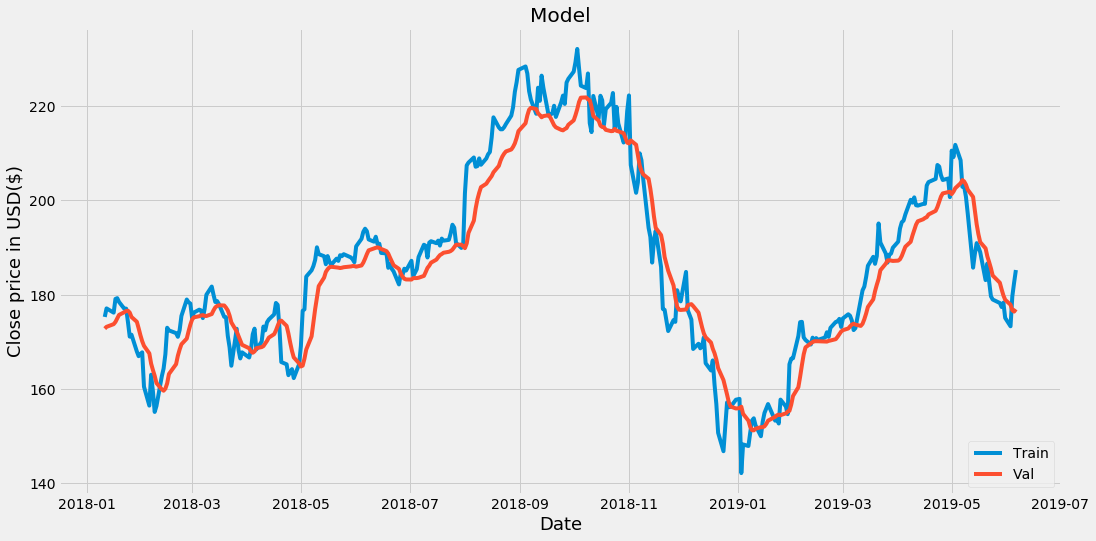

In [40]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price in USD($)',fontsize=18)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [41]:
valid

,Close,Predictions
Date,,
2018-01-11,175.279999,172.805389
2018-01-12,177.089996,173.184402
2018-01-16,176.190002,173.752991
2018-01-17,179.100006,174.221954
2018-01-18,179.259995,174.946869
2018-01-19,178.460007,175.710251
2018-01-22,177.000000,176.294693
2018-01-23,177.039993,176.538864
2018-01-24,174.220001,176.596100
